<a href="https://colab.research.google.com/github/MengOonLee/BertelsmannAITrack/blob/Lesson05/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:05, 4862940.81it/s]                              


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 38443.65it/s]                           
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


4423680it [00:02, 1695760.99it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


8192it [00:00, 15300.45it/s]            

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


In [0]:
from torch import nn, optim
import torch.nn.functional as F

# Build a network architecture
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)

    # Dropout module with 0.2 drop probability
    self.dropout = nn.Dropout(p=0.2)

  def forward(self, x):
    # input tensor is flattened
    x = x.view(x.shape[0], -1)
    # With dropout
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    # Output with no dropout
    x = F.log_softmax(self.fc4(x), dim=1)
    return x

In [3]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Train the network
epochs = 30
steps = 0
train_losses, test_losses = [], []

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    optimizer.zero_grad()
    log_ps = model(images)
    loss = criterion(log_ps, labels)    
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  else:
    test_loss = 0
    accuracy = 0
    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
      model.eval()
      for images, labels in testloader:
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

    model.train()

    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
          "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.603..  Test Loss: 0.514..  Test Accuracy: 0.815
Epoch: 2/30..  Training Loss: 0.481..  Test Loss: 0.445..  Test Accuracy: 0.842
Epoch: 3/30..  Training Loss: 0.451..  Test Loss: 0.448..  Test Accuracy: 0.836
Epoch: 4/30..  Training Loss: 0.434..  Test Loss: 0.427..  Test Accuracy: 0.845
Epoch: 5/30..  Training Loss: 0.421..  Test Loss: 0.407..  Test Accuracy: 0.855
Epoch: 6/30..  Training Loss: 0.412..  Test Loss: 0.422..  Test Accuracy: 0.854
Epoch: 7/30..  Training Loss: 0.404..  Test Loss: 0.412..  Test Accuracy: 0.853
Epoch: 8/30..  Training Loss: 0.397..  Test Loss: 0.410..  Test Accuracy: 0.858
Epoch: 9/30..  Training Loss: 0.394..  Test Loss: 0.409..  Test Accuracy: 0.861
Epoch: 10/30..  Training Loss: 0.389..  Test Loss: 0.395..  Test Accuracy: 0.866
Epoch: 11/30..  Training Loss: 0.382..  Test Loss: 0.382..  Test Accuracy: 0.861
Epoch: 12/30..  Training Loss: 0.383..  Test Loss: 0.376..  Test Accuracy: 0.867
Epoch: 13/30..  Training Loss: 0.379.

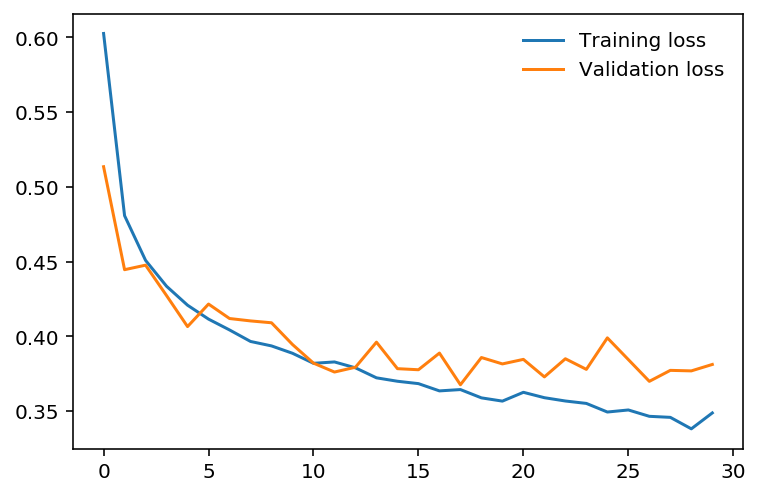

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="Validation loss")
plt.legend(frameon=False)